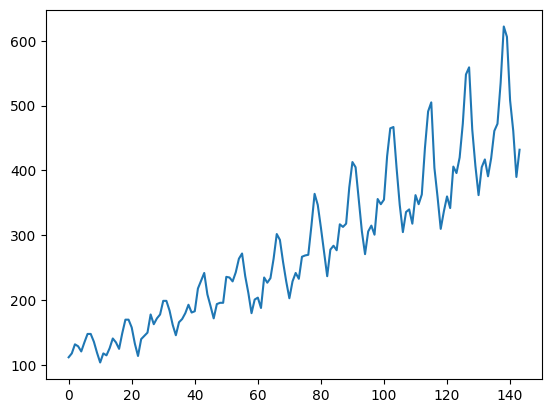

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

Epoch 1/100


c:\Users\kiril\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 1s - 12ms/step - loss: 0.0402
Epoch 2/100
94/94 - 0s - 1ms/step - loss: 0.0200
Epoch 3/100
94/94 - 0s - 1ms/step - loss: 0.0153
Epoch 4/100
94/94 - 0s - 1ms/step - loss: 0.0141
Epoch 5/100
94/94 - 0s - 1ms/step - loss: 0.0133
Epoch 6/100
94/94 - 0s - 1ms/step - loss: 0.0123
Epoch 7/100
94/94 - 0s - 1ms/step - loss: 0.0114
Epoch 8/100
94/94 - 0s - 1ms/step - loss: 0.0105
Epoch 9/100
94/94 - 0s - 1ms/step - loss: 0.0096
Epoch 10/100
94/94 - 0s - 1ms/step - loss: 0.0087
Epoch 11/100
94/94 - 0s - 1ms/step - loss: 0.0078
Epoch 12/100
94/94 - 0s - 1ms/step - loss: 0.0070
Epoch 13/100
94/94 - 0s - 1ms/step - loss: 0.0062
Epoch 14/100
94/94 - 0s - 1ms/step - loss: 0.0054
Epoch 15/100
94/94 - 0s - 1ms/step - loss: 0.0049
Epoch 16/100
94/94 - 0s - 1ms/step - loss: 0.0041
Epoch 17/100
94/94 - 0s - 1ms/step - loss: 0.0036
Epoch 18/100
94/94 - 0s - 1ms/step - loss: 0.0032
Epoch 19/100
94/94 - 0s - 1ms/step - loss: 0.0028
Epoch 20/100
94/94 - 0s - 1ms/step - loss: 0.0026
Epoch 21/100
94/94 -

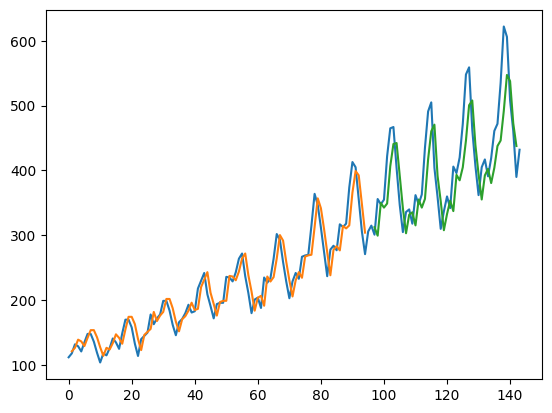

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


numpy.random.seed(7)


dataframe = read_csv(
    'data/international-airline-passengers.csv',
    usecols=[1],
    engine='python',
    skipfooter=3
)
dataset = dataframe.values
dataset = dataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]


look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))


trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict


plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
